# Website Average Session Duration Hypothesis Test
Problem Definition

A company suspects that the **average session duration on their website is not truly 170 seconds** as reported by analytics software.  
To verify this claim, a sample of recorded user session durations (in seconds) is analyzed statistically.

Hypotheses

- **H₀ (Null Hypothesis):** The true average session duration = 170 seconds  
- **H₁ (Alternative Hypothesis):** The true average session duration ≠ 170 seconds  


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

In [ ]:
session_durations = np.array([
    17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119,
    157, 145, 127, 244, 163, 114, 145, 65, 156, 187, 154, 155,
    112, 185, 202, 146, 203, 224, 203, 114, 188, 135, 177, 95,
    165, 50, 110, 216, 138, 151, 166, 84, 251, 173, 131, 207,
    121, 120
])
session_durations[:10]


array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [ ]:
desc = stats.describe(session_durations)
print(desc)
print(f"\nSample Mean: {np.mean(session_durations):} seconds")


DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.036326530612, skewness=-0.3239889727869448, kurtosis=-0.05849823498415896)

Sample Mean: 154.38 seconds


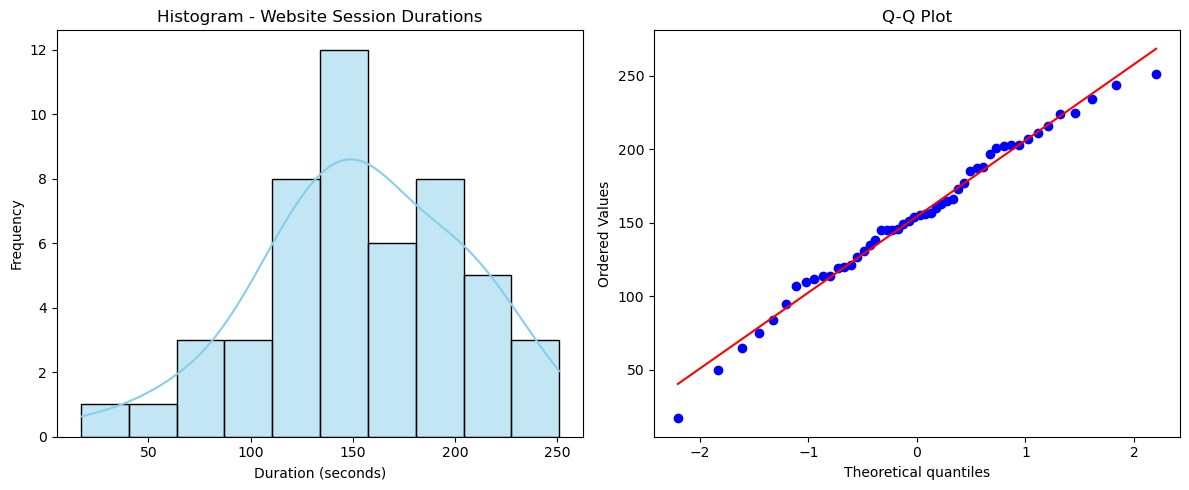

In [7]:
plt.figure(figsize=(12,5))

# Histogram graph
plt.subplot(1,2,1)
sns.histplot(session_durations, kde=True, bins=10, color='skyblue')
plt.title("Histogram - Website Session Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")

# qqplot
plt.subplot(1,2,2)
stats.probplot(session_durations, dist='norm', plot=pylab)
plt.title("Q-Q Plot")

plt.tight_layout()
plt.show()


In [ ]:
#Shapiro graph
stat, p_value = stats.shapiro(session_durations)
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value > 0.05:
    print("Fail to reject H₀ → The data appears normally distributed.")
else:
    print("Reject H₀ → The data does not appear normally distributed.")


Shapiro-Wilk Test Statistic: 0.9853
p-value: 0.7849
✅ Fail to reject H₀ → The data appears normally distributed.


In [ ]:
#t testi
mu_0 = 170

t_stat, p_val = stats.ttest_1samp(session_durations, mu_0)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print("Reject H0 → The true mean is significantly different from 170 seconds.")
else:
    print("Fail to reject H0 → There is no significant difference from 170 seconds.")


t-statistic: -2.1753
p-value: 0.0345
🚨 Reject H0 → The true mean is significantly different from 170 seconds.
